<a href="https://colab.research.google.com/github/PuchToTalk/Sentiment_analysis/blob/main/Analyse_de_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers

tokenizer = Tokenizer(oov_token="<OOV>")

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IA LAB_Projet perso/ANALYSE DE SENTIMENT/Tweets.csv')

sentiments = []
numerical_sentiment = []
messages = []

def cleaning(message:str):
  char = "[](){}\/'!?.,;:“”…-’‘&#" + '"'

  for x in char:
    message = message.replace(x,"")
  
  frag = message.split()
  frag.pop(0)

  message = ""

  for x in frag:
    message += x + " "

  return(message)

for k in range(len(df.index)):
  sentiments.append(df["airline_sentiment"][k])
  messages.append(cleaning(df["text"][k]))

  #print(df["airline_sentiment"][k] + " : " + cleaning(df["text"][k]))

data = {'id':range(len(df.index)),'sentiment':sentiments,'review':messages}
df = pd.DataFrame(data)
df
df.to_csv('/content/drive/MyDrive/IA LAB_Projet perso/ANALYSE DE SENTIMENT/Tweets cleaned.csv', index = False, header=True)

FileNotFoundError: ignored

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/GARAGE LIFE/IA PROJETS PERSO/ANALYSE DE SENTIMENT/Tweets cleaned.csv')
df = df[df['sentiment'] != 'neutral']

sentiment_label = df.sentiment.factorize()

text = df.review.values
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(text)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(text)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

embedding_vector_length = 32

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_vector_length, input_length=200),
    tf.keras.layers.SpatialDropout1D(0.25),
    tf.keras.layers.LSTM(50, dropout=0.5, recurrent_dropout=0.5),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           453984    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 470,635
Trainable params: 470,635
Non-trainable params: 0
__________________________________________________

<Figure size 432x288 with 0 Axes>

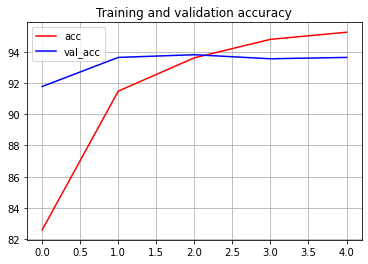

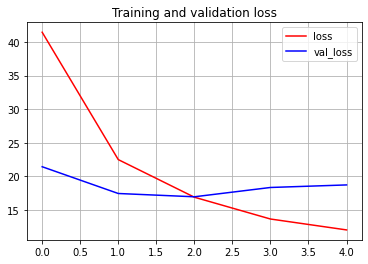

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = [i*100 for i in acc]
val_acc = [i*100 for i in val_acc]
loss = [i*100 for i in loss]
val_loss = [i*100 for i in val_loss]

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', label='acc')
plt.plot(epochs, val_acc, 'b', label='val_acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid(True)
plt.figure()

plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid(True)
plt.figure()

In [ ]:
test_word = "This was not the best company"

tw = tokenizer.texts_to_sequences([test_word])
print(str(tw) + "\n")
tw = pad_sequences(tw, maxlen=200)

prediction = int(model.predict(tw).round().item())
sentiment_label[1][prediction]

[[None, None, None, None, None, None]]



TypeError: ignored